### Sarcasm Detector

- Data Collection
  - Import wanted libraries
  - Import a Kaggle DataSet based on Text Form (example would be --> https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection)
  - Use Pandas To Turn it into DataFrame
  - Explore DataSet and the Data it contains

In [26]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
! mkdir data

mkdir: data: File exists


In [28]:
dataFrame = pd.read_json("../Sarcasm-Detector/data/Sarcasm_Headlines_Dataset.json", lines=True)
dataFrame.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

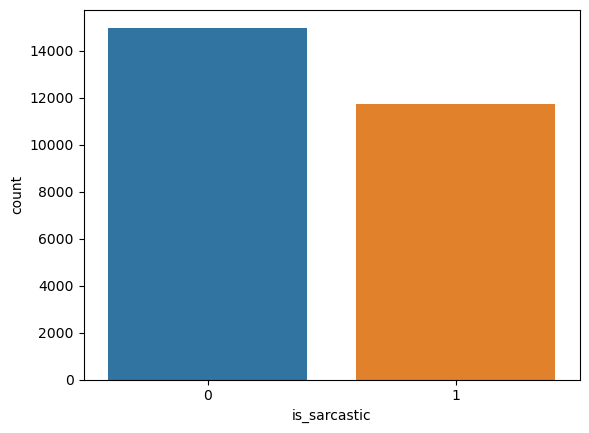

In [29]:
sns.countplot(dataFrame.is_sarcastic)

In [30]:
dataFrame['headline_split'] = dataFrame.headline.apply(lambda x: len(x.split()))

In [31]:
sarcastic_data_frame= dataFrame[dataFrame["is_sarcastic"] == 1]
serious_sarcastic_data_frame= dataFrame[dataFrame["is_sarcastic"] == 0]

/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ferasdahrooge/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


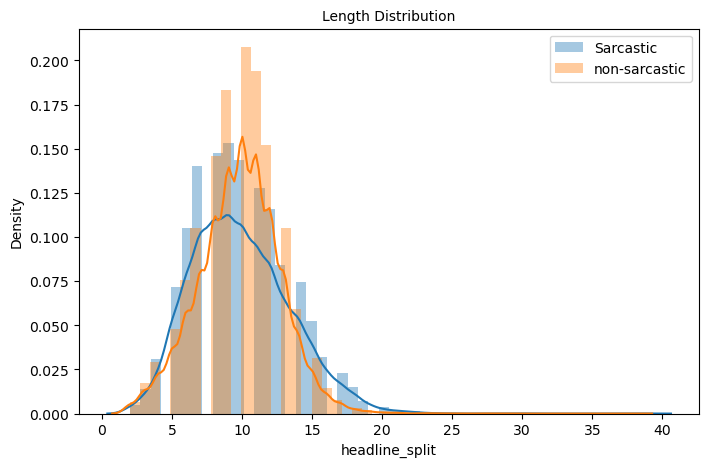

In [32]:
dataFrame["headline_split"] = dataFrame.headline.apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.distplot(sarcastic_data_frame.headline_split, hist= True, label= 'Sarcastic')
sns.distplot(serious_sarcastic_data_frame.headline_split, hist= True, label= 'non-sarcastic')
plt.legend()
plt.title('Length Distribution', fontsize = 10)
plt.show()

#### Cleaning the Data

In [33]:
headline_array = np.array(dataFrame.headline)

In [46]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [53]:
stop_words = stopwords.words('english')
punctuation = string.punctuation
lemmatizer = WordNetLemmatizer()

##### Test of Preprocess a specific text

In [58]:
word_test = word_tokenize(headline_array[0])
word_test = [w.lower() for w in word_test]
words = [lemmatizer.lemmatize(word, "v") for word in word_test]
words

['former',
 'versace',
 'store',
 'clerk',
 'sue',
 'over',
 'secret',
 "'black",
 'code',
 "'",
 'for',
 'minority',
 'shoppers']

##### PreProcess Text

- lower case of all texts
- remove newline characters
- lemmetize 

In [73]:
def preprocess_text(df, column, new_column):
  """
  Removes stop words from a column
  """
  # Tokenize the sentences
  df[new_column] = df[column].apply(lambda x: x.lower())
  df[new_column].apply(lambda x: re.sub("\\n", "" , x))
  df[new_column].apply(lambda x: word_tokenize(x))
  # # Remove stop words
  df[new_column].apply(lambda x: [lemmatizer.lemmatize(word, pos="v") for word in x])
  df[new_column].apply(lambda x: [word for word in x if word not in stop_words])
  df[new_column].apply(lambda x: [word for word in x if word not in punctuation])
  # # Join the sentences back together
  df[new_column].apply(lambda x: " ".join(x))
  return df


In [74]:
def preprocessed_headline_split(df , column , new_column):
  df[new_column] = df[column].apply(lambda x: len(x.split()))
  return df

In [75]:
data_adjusted = preprocess_text(dataFrame, 'headline', "new_headline")
data_preprocessed = preprocessed_headline_split(data_adjusted, "new_headline", 'new_headline_split')

In [76]:
data_preprocessed

,article_link,headline,is_sarcastic,headline_split,new_headline,new_headline_split
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues secret 'black ...,0,12,former versace store clerk sues secret 'black ...,11
1,https://www.huffingtonpost.com/entry/roseanne-...,'roseanne ' revival catches thorny political m...,0,14,'roseanne ' revival catches thorny political m...,10
2,https://local.theonion.com/mom-starting-to-fea...,mom starting fear son 's web series closest th...,1,14,mom starting fear son 's web series closest th...,10
3,https://politics.theonion.com/boehner-just-wan...,"boehner wants wife listen , come alternative d...",1,13,"boehner wants wife listen , come alternative d...",9
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday magic...,0,11,j.k. rowling wishes snape happy birthday magic...,8
...,...,...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics moral free-fall,0,5,american politics moral free-fall,4
26705,https://www.huffingtonpost.com/entry/americas-...,america 's best 20 hikes,0,4,america 's best 20 hikes,5
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations obama,0,3,reparations obama,2
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,8,israeli ban targeting boycott supporters raise...,8


##### Check Average

This is just to check the average number of words after preprocessing our data in the dataset for both serious and sarcastic

In [80]:
data_preprocessed.groupby(['is_sarcastic']).new_headline_split.mean()

is_sarcastic
0    7.733667
1    7.944729
Name: new_headline_split, dtype: float64

##### Get Largest

This is just to check the number of words in our biggest sentence based on what the sentence is labelled as

In [81]:
data_preprocessed.groupby(['is_sarcastic']).new_headline_split.max()

is_sarcastic
0    24
1    44
Name: new_headline_split, dtype: int64

#### Splitting the Data

- Split Data into 3 ways training validation and testing of 75%/12.5%/12.5%

In [115]:
import tensorflow_datasets as tfds
import tensorflow as tf


def get_dataset_partitions_pd(df, train_split=0.75, val_split=0.125, test_split=0.125):
  # assert the sum of all the data split = 1
  assert(train_split + val_split + test_split) == 1
  # assert for equal splitting for both validation and testing
  assert(val_split == test_split)

  labels = df['is_sarcastic'].unique()
  #Split the Data
  df_sample = df.sample(frac = 1 , random_state = 42)
  
  train_df = df_sample.sample(frac = train_split, random_state = 42)
  val_df = df_sample.sample(frac = val_split, random_state = 42)
  test_df = df_sample.sample(frac = test_split, random_state = 42)
  # return train, val, test dataframes
  return train_df, val_df, test_df

In [116]:
train_ds , val_ds , test_ds  = get_dataset_partitions_pd(data_preprocessed) 

In [117]:
val_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    1849
1    1490
Name: new_headline_split, dtype: int64

In [118]:
test_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    1849
1    1490
Name: new_headline_split, dtype: int64

In [119]:
train_ds.groupby(["is_sarcastic"]).new_headline_split.count()

is_sarcastic
0    11225
1     8807
Name: new_headline_split, dtype: int64